# **Pràctica 1: Integració amb el mètode de simulació Monte Carlo**

<hr>

**[1] Nom:**Izan Garrido Dorado

**[1] NIU:**1704520

**[1] mail (gmail):**izanraptor@gmail.com

<hr>

**[2] Nom:**Pablo López Fiol

**[2] NIU:**1706501

**[2] mail (gmail):**pablolopezfiol10@gmail.com

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr1_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr1_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr1_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr1_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

# **Context**

Anem a utilitzar el mètode d'integració per Monte Carlo per calcular el valor de $\pi$. Aquest mètode utilitza la aleatorietat per aproximar solucions numèriques a problemes matemàtics. En el nostre cas, volem calcular l'àrea d'un cercle de radi 1.

Per començar, definim un quadrat en el qual cap aquest cercle de radi 1. Aquest quadrat tindrà dimensions $2x2$ i estarà centrat en l'origen del pla cartesià.

Ara bé, si generem nombres aleatoris uniformement distribuïts en aquest pla (és a dir, cada punt té la mateixa probabilitat d'aparèixer en qualsevol lloc dins del quadrat), podem determinar quants d'aquests punts cauen dins el cercle de radi 1.

Per verificar si un punt $(x, y)$ està dins del cercle, utilitzem la condició matemàtica que la distància a l'origen $(0,0)$ ha de ser menor o igual a 1. És a dir, si la suma dels quadrats de les coordenades $(x^2 + y^2)$ és menor o igual a 1, llavors el punt està dins el cercle.

Portarem un registre de dues quantitats importants:

*   El nombre total de punts que generem ($N_{total}$).
*   El nombre de punts que cauen dins el cercle ($N_{dins}$).

Si dividim el nombre de punts dins del cercle ($N_{dins}$) pel nombre total de punts ($N_{total}$), hauríem d'obtenir una fracció que és una aproximació de la raó de les àrees del cercle al quadrat. Com que l'àrea del cercle és $\pi$ i l'àrea del quadrat és 4, aquesta fracció hauria de ser aproximadament igual a $\pi$/4. Per tant, per estimar el valor de $\pi$, multiplicarem aquesta fracció per 4:

$$
\pi≈4 \frac{N_{in}}{N_{total}}
$$

Un cop hem generat una quantitat suficient de punts, aquesta aproximació hauria de convergir cap al valor real de 𝜋.

### <font color='orange'>**> Python #1**</font>

Anem a dibuixar el cercle i l'àrea on llançarem els punts aleatoris:

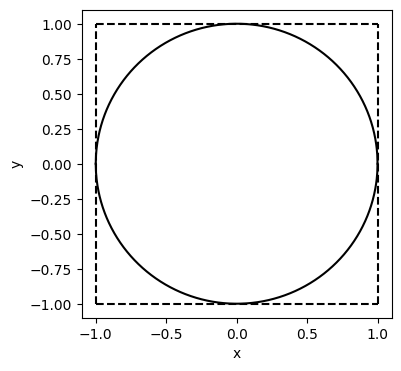

In [ ]:
# El teu codi
import numpy as np

import matplotlib.pyplot as plt

def f(x):
  return np.sqrt(1-x**2)

x = np.linspace(-1,1,1000)

fig = plt.figure(figsize=(4,4))
plt.plot(x,f(x),'k-')
plt.plot(x,-f(x),'k-')
plt.xlabel("x")
plt.ylabel("y")

plt.hlines(1,-1,1,"k", linestyles="dashed")
plt.hlines(-1,-1,1,"k", linestyles="dashed")
plt.vlines(1,-1,1,"k", linestyles="dashed")
plt.vlines(-1,-1,1,"k", linestyles="dashed")



### <font color='orange'>**> Python #2**</font>

Genera 1000 punts aleatoris dins de l'àrea d'integració, i pinta en verd els que cauen a dins del cercle, i en vermell els que han caigut a fora.

Imprimeix per pantalla la teva estimació del número $\pi$. Varía molt aquest càlcul si re-executes aquesta cel·la?

'\nx_valid=x[np.abs(y)< f(x)]\ny_valid=y[np.abs(y)< f(x)]\n\nfig =plt.figure(figsize=(4,4))\n'

<Figure size 400x400 with 0 Axes>

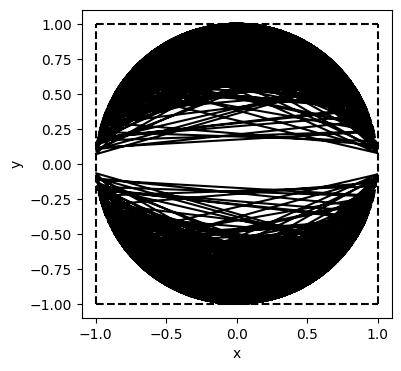

In [ ]:
# El teu codi
import numpy as np
import matplotlib.pyplot as plt
x_p=np.random.uniform(-1,1,1000)
y_p=np.random.uniform(-1,1,1000)
fig=plt.figure(figsize=(4,4))

def f(x):
  return np.sqrt(1-x_p**2)

x = np.linspace(-1,1,1000)

fig = plt.figure(figsize=(4,4))
plt.plot(x_p,f(x),'k-')
plt.plot(x_p,-f(x),'k-')
plt.xlabel("x")
plt.ylabel("y")

plt.hlines(1,-1,1,"k", linestyles="dashed")
plt.hlines(-1,-1,1,"k", linestyles="dashed")
plt.vlines(1,-1,1,"k", linestyles="dashed")
plt.vlines(-1,-1,1,"k", linestyles="dashed")
"""
x_valid=x[np.abs(y)< f(x)]
y_valid=y[np.abs(y)< f(x)]

fig =plt.figure(figsize=(4,4))
"""



### <font color='orange'>**> Python #3**</font>

Quan només tenim un petit nombre de punts, l'estimació de $\pi$ no és molt precisa, però quan tenim centenars de milers de punts, ens acostem molt més al valor real.

Anem a veure com convergeix la precisió del valor calculat, comparant amb $numpy.pi$, quan augmentem el nombre $N_{total}$ de punts aleatoris.

Estima la precissió en percentatge com:

$$
Prec = 100.*\frac{|\pi - \pi_{estimat}|}{\pi}
$$

i evalua aquesta precissió per N_total=10,100,1000,10000,100000 i 1000000.

Fes dues gràfiques:

*   $\pi_{estimat}$ vs. $N_{total}$ (i mostra una línea horitzontal al valor de $\pi$)
*   *Prec* vs. $N_{total}$ (i mostra dues línees horitzontals pels valors 1% i 0.1%)

In [ ]:
# El teu codi
import numpy as np

Ntot=10000

for i in range(Ntot):
  x=np.random.uniform(-1,1)
  y=np.random.uniform(-1,1)

  if x**2+y**2<=1:
    Nint=Nint+1

print(4*Nint/Ntot)

### <font color='orange'>**> Python #4 (opcional)**</font>

Si re-executes la cel·la anterior, veuràs que el valor de la precissió per $N_{total}$ petits fluctua molt! Hauriem d'executar moltes vegades, i per a cada valor de $N_{total}$ calcular la mitja del teu càlcul de $\pi$.

Fes una gràfica de *Prec* vs. $N_{total}$, on per a cada valor de $N_{total}$ mostres la mitja (i error en la mitja) d'haver executat 10 simulacions per a cadascun dels valors de $N_{total}$.

In [ ]:
# El teu codi





SyntaxError: invalid syntax (<ipython-input-13-702b52bcd02b>, line 6)

### <font color='green'>**> ENTREGA**</font>

Anem a calcular amb aquest mètode d'integració Monte Carlos l'àrea compresa entre el semi-cercle de radi $\pi/2$ centrat a (y=0,x=$\pi/2$), per y>0, i la funció $sin(x)$, a l'interval $[0,pi]$. És a dir, aquesta àrea:

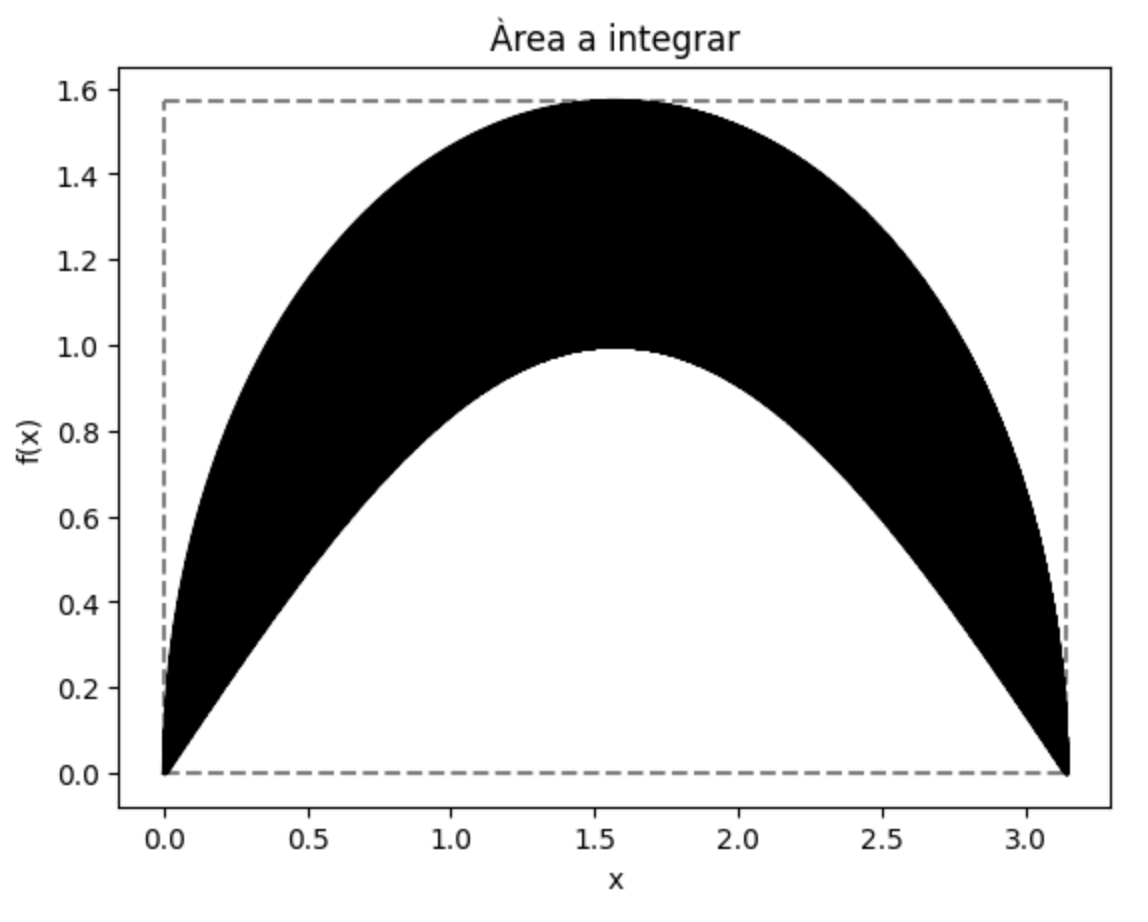

### <font color='green'>**> Entrega #1**</font>

Dibuixa les dues funcions i l'àrea d'integració. **[3 punts]**

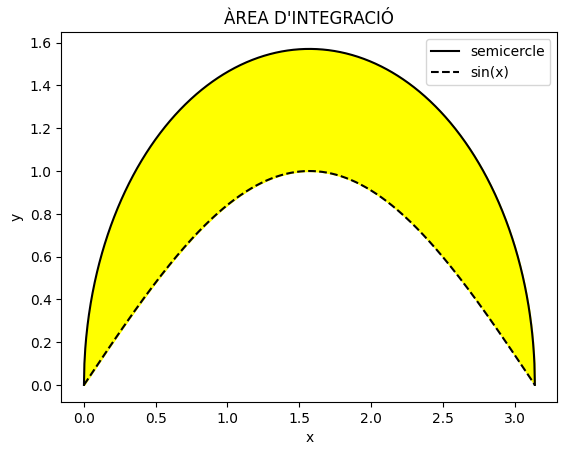

In [19]:
# El teu codi
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,np.pi,1000)

f_1=np.sin(x)
r=np.pi/2
f_2=np.sqrt(r**2-(x-r)**2)

plt.plot(x,f_2,color="black", label="semicercle")
plt.plot(x,f_1,color="black", label="sin(x)", linestyle="dashed")

plt.fill_between(x,f_1,f_2,color="yellow")

plt.xlabel("x")
plt.ylabel("y")
plt.title("ÀREA D'INTEGRACIÓ")
plt.legend()
plt.show()


### <font color='green'>**> Entrega #2**</font>

Genera 1000 punts aleatoris dins de l'àrea d'integració, i pinta en verd els que cauen a dins del cercle, i en vermell els que han caigut a fora.

Imprimeix per pantalla la teva estimació de l'àrea. **[3 punts]**


Estimació àrea = 1.8801596384075225


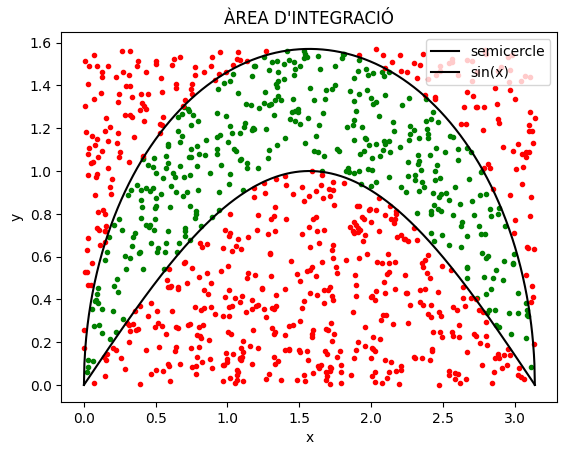

In [5]:
# El teu codi
import numpy as np
import matplotlib.pyplot as plt
N=1000
x_p=[]
y_p=[]

x_n=[]
y_n=[]

t=np.linspace(0,np.pi,N)
f_1_2=np.sin(t)
r=np.pi/2
f_2_2=np.sqrt(r**2-(t-r)**2)
x=np.random.uniform(0,np.pi,N)
y=np.random.uniform(0,np.pi/2,N)
f_1=np.sin(x)
r=np.pi/2
f_2=np.sqrt(r**2-(x-r)**2)
x_valid=x[(f_1 < y) & (y < f_2)]
y_valid=y[(f_1 < y) & (y < f_2)]
x_p.append(x_valid)
y_p.append(y_valid)
x_no_valid=(x[(f_1 >= y) | (y >= f_2)])
y_no_valid=(y[(f_1 >= y) | (y >= f_2)])
x_n.append(x_no_valid)
y_n.append(y_no_valid)
plt.plot(x_p,y_p,'.', color="green")
plt.plot(x_n,y_n,'.', color="red")
x=np.linspace(0,np.pi,N)




plt.plot(t,f_1_2,color="black", label="semicercle")
plt.plot(t,f_2_2,color="black", label="sin(x)")

area_rectangle = np.pi * r
A_mc=area_rectangle*len(x_valid)/N
print("Estimació àrea =", A_mc)





plt.xlabel("x")
plt.ylabel("y")
plt.title("ÀREA D'INTEGRACIÓ")
plt.legend()
plt.show()

### <font color='green'>**> Entrega #3**</font>

De fet, aquesta àrea la podem calcular de forma analítica. No és més que la integral del semi-cercle menys la integral de "sin(x)":

$$
A_{analítica} = \frac{\pi^3}{8}-2 \sim 1.876
$$

Augmenta el nombre $N_{total}$ de punts aleatoris i estima la precissió en percentatge de la teva mesura com:

$$
Prec = 100.*\frac{|A_{analítica} - A_{mc}|}{A_{Analítica}}
$$

i evalua aquesta precissió per N_total=10,100,1000,10000,100000 i 1000000.

Fes la gràfica:

*   *Prec* vs. $N_{total}$ (i mostra dues línees horitzontals pels valors 1% i 0.1%)

**[4 punts]**

Estimació precisions (%) = [47.39016843768999, 7.932794765957476, 1.0935166628571757, 0.45847336823096135, 0.18599706840732097, 0.07288593054836216]


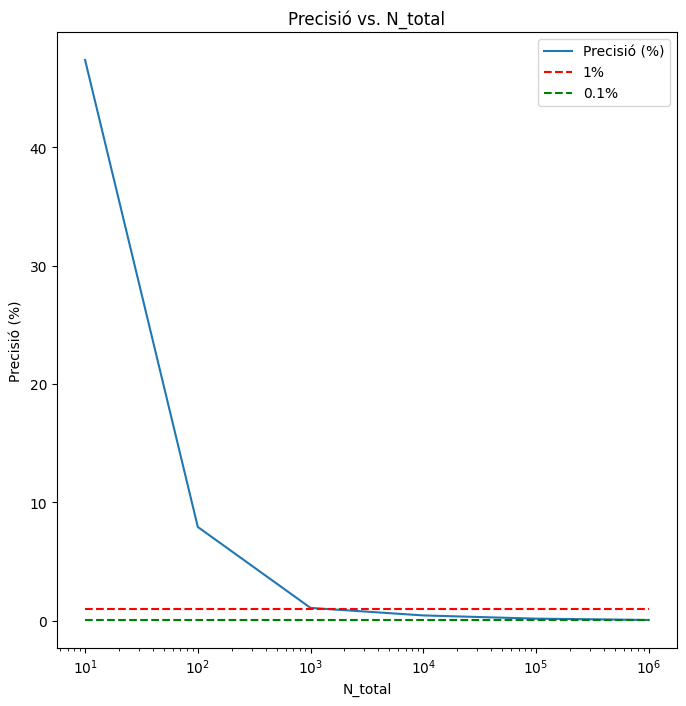

In [18]:
# El teu codi

import numpy as np
import matplotlib.pyplot as plt

N = [10, 100, 1000, 10000, 100000, 1000000]
precisions = []

x_p = []
y_p = []

x_n = []
y_n = []

r = np.pi / 2
area_rectangle = np.pi * r

for i in N:
    x = np.random.uniform(0, np.pi, i)
    y = np.random.uniform(0, np.pi/2, i)

    f_1 = np.sin(x)
    f_2 = np.sqrt(r**2 - (x - r)**2)

    x_valid = x[(f_1 < y) & (y < f_2)]
    y_valid = y[(f_1 < y) & (y < f_2)]

    x_p.append(x_valid)
    y_p.append(y_valid)

    x_no_valid = x[(f_1 >= y) | (y >= f_2)]
    y_no_valid = y[(f_1 >= y) | (y >= f_2)]

    x_n.append(x_no_valid)
    y_n.append(y_no_valid)

    A_mc = area_rectangle * len(x_valid) / i
    precisions.append(100 * abs(1.876 - A_mc) / 1.876)

print("Estimació precisions (%) =", precisions)

plt.figure(figsize=(8, 8))
plt.plot(N, precisions, linestyle='-', label='Precisió (%)')
plt.hlines(y=1, xmin=min(N), xmax=max(N), colors='red', linestyles='--', label='1%')
plt.hlines(y=0.1, xmin=min(N), xmax=max(N), colors='green', linestyles='--', label='0.1%')

plt.xlabel('N_total')
plt.ylabel('Precisió (%)')
plt.xscale('log')
plt.title('Precisió vs. N_total')
plt.legend()
plt.show()








<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr1_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr1_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr1_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr1_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.
<hr>